In [19]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel
import pandas as pd

In [20]:
# Load the dataset
df = pd.read_csv(r"D:\1.5110 Predictive Modeling\xyz_sportswear_dataset_random.csv")


In [22]:
# Convert 'Requested Delivery Date' and 'Order Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Requested Delivery Date'] = pd.to_datetime(df['Requested Delivery Date'])

# Calculate the time difference in days
df['Time Difference'] = (df['Requested Delivery Date'] - df['Order Date']).dt.days

# Add 'Fast Demand' column
df['Fast Demand'] = np.where(df['Time Difference'] > 30, 1, 0)

# Drop the temporary 'Time Difference' column if not needed
df = df.drop('Time Difference', axis=1)


In [23]:
df

,Order Date,Requested Delivery Date,Customer Country Code,Product Code,Description,Order Type,Customer Order Code,Value,Currency,Items,Route,Fast Demand
0,2009-03-24,2009-06-15,USA,P004,Parka - P004,VO,CO-3417,910.66,AUD,139.320725,Rail,1
1,2009-11-09,2010-01-01,USA,P001,Parka - P001,VO,CO-5441,592.45,GBP,102.874628,Road,1
2,2010-05-13,2010-08-23,GBR,P003,Parka - P003,VO,CO-8435,929.19,USD,775.872252,Sea,1
3,2011-03-01,2011-06-06,CAN,P005,Parka - P005,VO,CO-4825,324.58,CAD,548.211910,Road,1
4,2010-07-15,2010-12-08,CAN,P002,Parka - P002,VO,CO-2256,560.60,CAD,484.419253,Air,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2416,2009-06-27,2009-12-01,CAN,P001,Parka - P001,VO,CO-6900,544.84,GBP,702.811924,Road,1
2417,2010-06-04,2010-09-20,GBR,P004,Parka - P004,VO,CO-4354,978.25,USD,577.213053,Sea,1
2418,2009-11-20,2010-01-28,CAN,P004,Parka - P004,VO,CO-9066,510.53,EUR,293.770780,Air,1
2419,2009-02-03,2009-03-21,CAN,P002,Parka - P002,VO,CO-6876,629.13,GBP,331.637407,Road,1


In [35]:
df['Product Code'].unique()

array(['P004', 'P001', 'P003', 'P005', 'P002'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order Date               2421 non-null   datetime64[ns]
 1   Requested Delivery Date  2421 non-null   datetime64[ns]
 2   Customer Country Code    2421 non-null   object        
 3   Product Code             2421 non-null   object        
 4   Description              2421 non-null   object        
 5   Order Type               2421 non-null   object        
 6   Customer Order Code      2421 non-null   object        
 7   Value                    2421 non-null   float64       
 8   Currency                 2421 non-null   object        
 9   Items                    2421 non-null   float64       
 10  Route                    2421 non-null   object        
 11  Fast Demand              2421 non-null   int32         
dtypes: datetime64[ns](2), float64(2), 

<Figure size 1200x600 with 0 Axes>

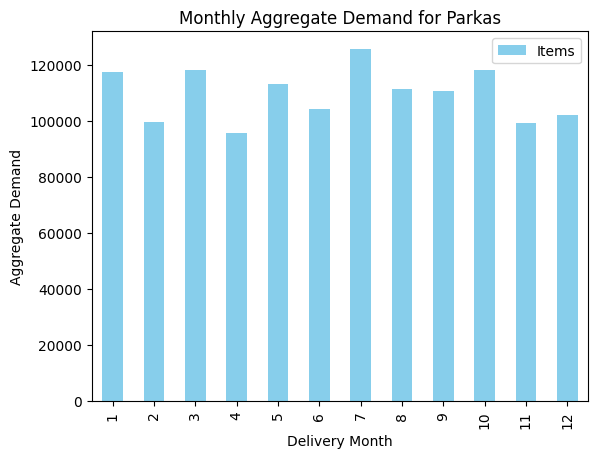

In [26]:
# Aggregate Demand
# By month
# Extract month from 'Requested Delivery Date'
df['DELIVERY_MONTH'] = df['Requested Delivery Date'].dt.month

# Aggregate demand by month
monthly_aggregate_demand = df.groupby('DELIVERY_MONTH')['Items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_aggregate_demand.plot(kind='bar', x='DELIVERY_MONTH', y='Items', color='skyblue')
plt.title('Monthly Aggregate Demand for Parkas')
plt.xlabel('Delivery Month')
plt.ylabel('Aggregate Demand')
plt.show()


<Figure size 1200x600 with 0 Axes>

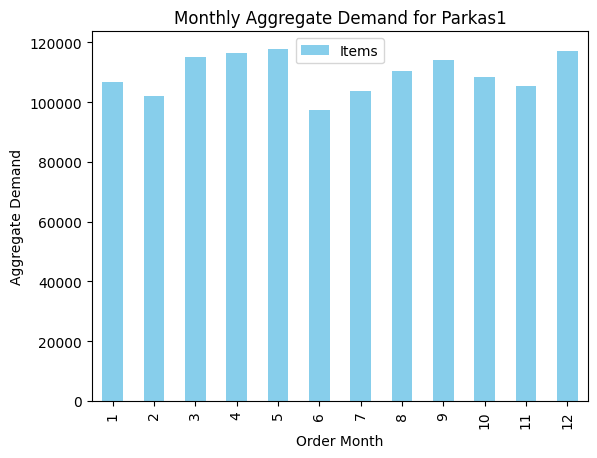

In [28]:
#By order date
df['ORDER_MONTH'] = df['Order Date'].dt.month

# Aggregate demand by month
monthly_aggregate_demand2 = df.groupby('ORDER_MONTH')['Items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_aggregate_demand2.plot(kind='bar', x='ORDER_MONTH', y='Items', color='skyblue')
plt.title('Monthly Aggregate Demand for Parkas1')
plt.xlabel('Order Month')
plt.ylabel('Aggregate Demand')
plt.show()

<Figure size 1200x600 with 0 Axes>

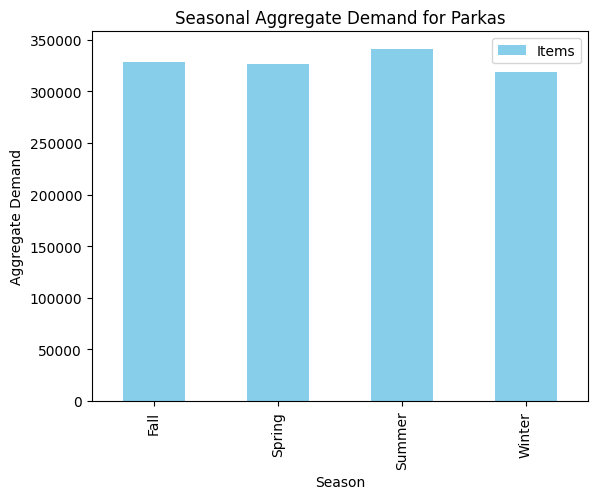

In [30]:
# By season (assuming 3-month seasons)
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
seasonal_aggregate_demand = df.groupby('SEASON')['Items'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
seasonal_aggregate_demand.plot(kind='bar', x='SEASON', y='Items', color='skyblue')
plt.title('Seasonal Aggregate Demand for Parkas')
plt.xlabel('Season')
plt.ylabel('Aggregate Demand')
plt.show()


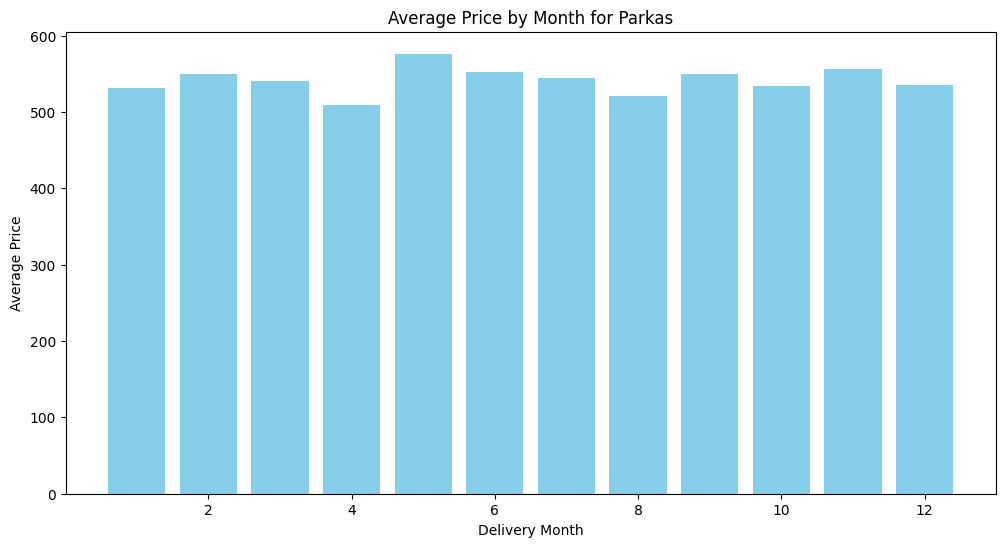

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided structure

# Aggregate Average Price by Month
df['DELIVERY_MONTH'] = df['Requested Delivery Date'].dt.month

# Calculate average price by month
average_price_by_month = df.groupby('DELIVERY_MONTH')['Value'].mean().reset_index()

# Plotting Average Price by Month
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_month['DELIVERY_MONTH'], average_price_by_month['Value'], color='skyblue')
plt.title('Average Price by Month for Parkas')
plt.xlabel('Delivery Month')
plt.ylabel('Average Price')
plt.show()

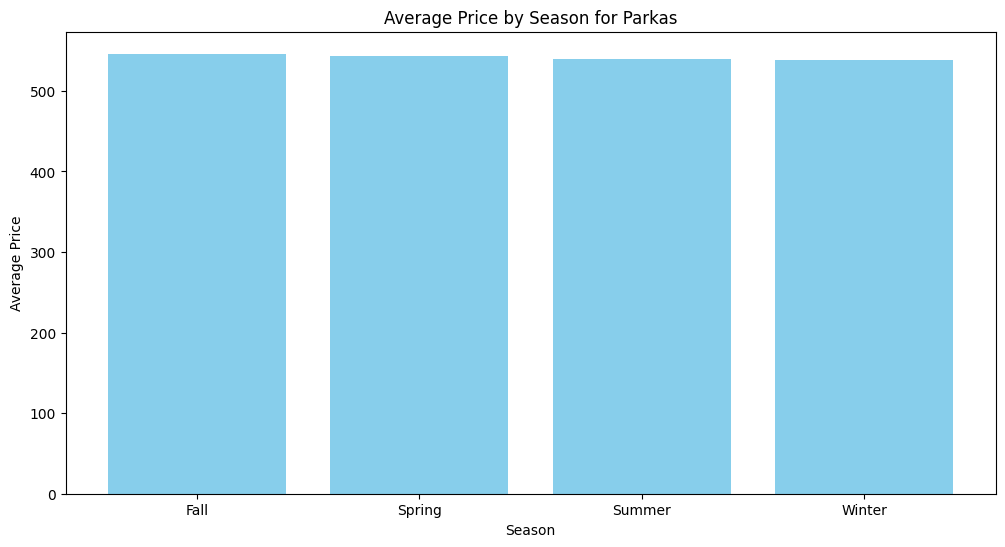

In [33]:
# Aggregate Average Price by Season
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))

# Calculate average price by season
average_price_by_season = df.groupby('SEASON')['Value'].mean().reset_index()

# Plotting Average Price by Season
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_season['SEASON'], average_price_by_season['Value'], color='skyblue')
plt.title('Average Price by Season for Parkas')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.show()

In [36]:
# Calculate sales for each product
df['Sales'] = df['Value'] * df['Items']

# Group by product code and sum the sales
product_sales = df.groupby('Product Code')['Sales'].sum().reset_index()

# Display the result
print(product_sales)


  Product Code         Sales
0         P001  1.366666e+08
1         P002  1.464116e+08
2         P003  1.400511e+08
3         P004  1.354148e+08
4         P005  1.551621e+08


In [37]:
# Extract month from 'Requested Delivery Date'
df['DELIVERY_MONTH'] = df['Requested Delivery Date'].dt.month

# Create a 'SEASON' column based on 'DELIVERY_MONTH'
df['SEASON'] = df['DELIVERY_MONTH'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))

# Calculate monthly and seasonal quantity for each product
monthly_quantity = df.groupby(['Product Code', 'DELIVERY_MONTH'])['Items'].sum().reset_index()
seasonal_quantity = df.groupby(['Product Code', 'SEASON'])['Items'].sum().reset_index()

# Display the results
print("Monthly Quantity:")
print(monthly_quantity)

print("\nSeasonal Quantity:")
print(seasonal_quantity)


Monthly Quantity:
   Product Code  DELIVERY_MONTH         Items
0          P001               1  25636.239637
1          P001               2  20828.918106
2          P001               3  21128.626546
3          P001               4  19928.701247
4          P001               5  20496.191948
5          P001               6  21349.576757
6          P001               7  21263.971532
7          P001               8  15372.907474
8          P001               9  18413.265655
9          P001              10  22455.037657
10         P001              11  23395.707414
11         P001              12  17490.566120
12         P002               1  20410.289397
13         P002               2  20023.036499
14         P002               3  26960.379098
15         P002               4  22029.095694
16         P002               5  22282.449304
17         P002               6  21410.269972
18         P002               7  24993.543990
19         P002               8  24698.738934
20         P002 

In [38]:
# Calculate monthly average price for each product
df['Monthly Average Price'] = df['Value'] / df['Items']

# Group by product code and month, then calculate the mean of the monthly average price
monthly_avg_price = df.groupby(['Product Code', 'DELIVERY_MONTH'])['Monthly Average Price'].mean().reset_index()

# Display the result
print(monthly_avg_price)


   Product Code  DELIVERY_MONTH  Monthly Average Price
0          P001               1               1.395067
1          P001               2               1.607439
2          P001               3               1.335771
3          P001               4               1.160048
4          P001               5               1.364776
5          P001               6               1.419400
6          P001               7               1.441553
7          P001               8               1.085787
8          P001               9               1.201329
9          P001              10               1.110429
10         P001              11               1.389302
11         P001              12               1.533993
12         P002               1               1.645838
13         P002               2               1.566679
14         P002               3               1.293593
15         P002               4               1.232833
16         P002               5               1.407413
17        